In [ ]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv


--2023-08-18 17:11:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.002s  

2023-08-18 17:11:35 (19.4 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [ ]:
import pandas as pd
df=pd.read_csv('teleCust1000t.csv')
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [ ]:
df.shape

(1000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [ ]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [ ]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [ ]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [ ]:
y = df['custcat'].values

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype('float'))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print('The train set is:',X_train.shape)
print('The test set is:', y_test.shape)

The train set is: (700, 11)
The test set is: (300,)


In [ ]:
#modeling
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)#learning
yhat = neigh.predict(X_test)# predicting

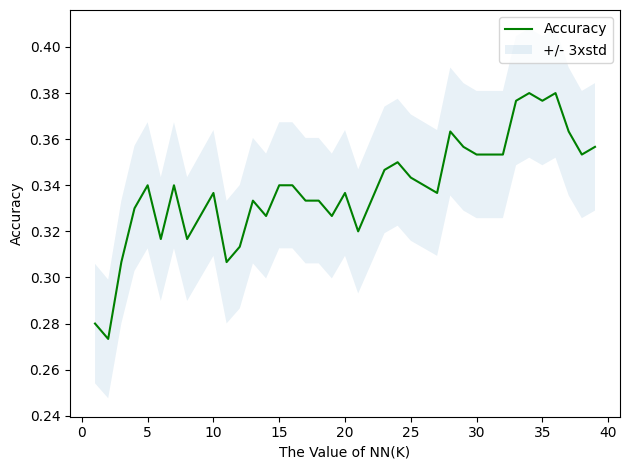

In [ ]:
from sklearn import metrics
import numpy as np

Ks = 40
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
  #Train Model and Predict
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
  yhat = neigh.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
  std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
#mean_acc
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy','+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('The Value of NN(K)')
plt.tight_layout()
plt.show()



In [ ]:
print('The best accuracy was with', mean_acc.max(),'with k=',mean_acc.argmax()+1)


The best accuracy was with 0.38 with k= 34


In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [ ]:
X = df[[  'age', 'income','ed' ]].values


In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype('float'))
X

array([[ 0.18450456, -0.12650641,  1.0877526 ],
       [-0.69181243,  0.54644972,  1.9062271 ],
       [ 0.82182601,  0.35951747, -1.36767088],
       ...,
       [ 1.37948227,  8.09851297,  1.9062271 ],
       [ 0.58283046,  0.08846569, -0.54919639],
       [-0.45281689, -0.36017173,  0.26927811]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
print('The train set is:',X_train.shape)
print('The test set is:', y_test.shape)

The train set is: (750, 3)
The test set is: (250,)


In [ ]:
#modeling
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)#learning
yhat = neigh.predict(X_test)# predicting

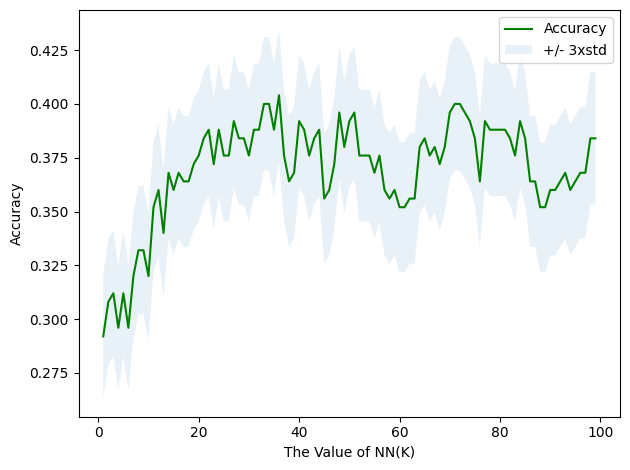

In [ ]:
from sklearn import metrics
import numpy as np

Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
  #Train Model and Predict
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
  yhat = neigh.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
  std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
#mean_acc
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy','+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('The Value of NN(K)')
plt.tight_layout()
plt.show()

In [ ]:
print('The best accuracy was with', mean_acc.max(),'with k=',mean_acc.argmax()+1)

The best accuracy was with 0.404 with k= 36
